# Integrated Intelligent Systems: Module 1 - Foundations (Tutorial)

This notebook introduces the fundamental components, challenges, and definitions central to designing and implementing Cognition-Enabled Robot Agents.

## Part 1: Concepts, Definitions and the Closed-Loop System

### 1.1 Intelligent Agents vs. Rational Agents

In [6]:
from IPython.display import display, HTML,IFrame
display(IFrame('rationality_against_intelligence.html', width=1000, height=1300))

### 1.2 Components of a Cognition-Enabled Robot Agent

Building an intelligent robot requires orchestrating multiple complex software components in a continuous loop.

In [7]:
from IPython.display import display, HTML,IFrame
display(IFrame('function_grounding.html', width=1000, height=1750))

### 1.2 Challenges of a Cognition-Enabled Robot Agent

Each of these components come with specific challenges.

In [8]:
from IPython.display import display, HTML,IFrame
display(IFrame('foundations_tutorial.html', width=1000, height=1000))

### 1.3 What is Meant by Integrated?

In [9]:
from IPython.display import display, HTML,IFrame
display(IFrame('integration_principles.html', width=1000, height=1300))

# Part 2: Hands-On

## 2.1 Simulating Sensor Noise and State Estimation

In a real robot, sensor data is never perfectly accurate. We model this uncertainty using Probabilistic State Estimation, often assuming Gaussian (Normal) noise.

The robot's belief about the world is the estimated mean, and its uncertainty is the estimated standard deviation of the noisy readings.

True Value: 2.50 m
Estimated Mean (Robot's Belief State): 2.50 m
Estimated Standard Deviation (Uncertainty): 0.10 m


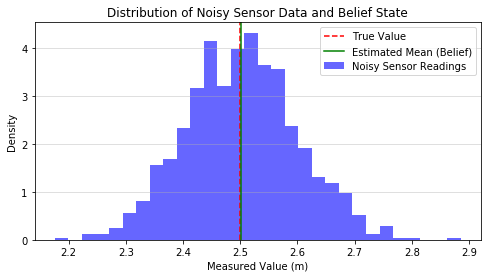

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# The actual, true value the robot is sensing (e.g., distance in meters)
TRUE_DISTANCE = 2.5 

# The standard deviation (sigma) representing the sensor's noise level
# (A lower value means a better, less noisy sensor)
NOISE_STD_DEV = 0.1 

# Number of readings taken
NUM_READINGS = 1000

# Set a seed for reproducibility
np.random.seed(42) 

# Simulate sensor readings by adding Gaussian noise around the TRUE_DISTANCE
readings = np.random.normal(loc=TRUE_DISTANCE, scale=NOISE_STD_DEV, size=NUM_READINGS)

# Calculate the robot's belief (estimated state)
estimated_mean = np.mean(readings)
estimated_std = np.std(readings)

print("True Value: {:.2f} m".format(TRUE_DISTANCE))
print("Estimated Mean (Robot's Belief State): {:.2f} m".format(estimated_mean))
print("Estimated Standard Deviation (Uncertainty): {:.2f} m".format(estimated_std))

# Plotting the distribution of sensor readings
plt.figure(figsize=(8, 4))
plt.hist(readings, bins=30, density=True, alpha=0.6, color='b', label='Noisy Sensor Readings')
plt.axvline(TRUE_DISTANCE, color='r', linestyle='--', linewidth=1.5, label='True Value')
plt.axvline(estimated_mean, color='g', linestyle='-', linewidth=1.5, label='Estimated Mean (Belief)')
plt.title('Distribution of Noisy Sensor Data and Belief State')
plt.xlabel('Measured Value (m)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

## 2.2 Conceptualizing the Sense-Reason-Plan-Act Loop

The following code conceptually illustrates how the robot uses its Belief State (confidence derived from State Estimation) to decide its next action, forming the closed loop.

In [58]:
# Conceptual representation of the Integrated Closed-Loop

class IntegratedRobotAgent:
    """A highly simplified model of the cognitive architecture's core loop."""
    def __init__(self, initial_goal, knowledge_base=None):
        self.KB = knowledge_base if knowledge_base else {'current_goal': initial_goal}
        self.belief_state = 0.5  # P(X): Initial confidence/probability state
        
    def update_belief(self, Z_data):
        """Simulates the State Estimation component updating confidence."""
        # Check for a 'critical error' or high noise
        if Z_data.get('is_noisy', False) or Z_data.get('critical_error', False):
            # Low confidence/high uncertainty
            return self.belief_state * 0.7 
        else:
            # High confidence/alignment
            return min(1.0, self.belief_state * 1.2 + 0.1) # Confidence increases

    def action_selection(self, current_belief):
        """Simulates the Task Planning component choosing the next step."""
        if current_belief < 0.3:
            return "EMERGENCY_STOP" # Low confidence requires halting operation
        elif current_belief < 0.8:
            return "Re_sense_Environment" # Medium confidence, try to get better data
        else:
            goal = self.KB['current_goal']
            # Highly rational, confident action sequence
            return "Execute_Plan_for_"+str(goal)+"_Step_1" 

    def sense_reason_plan_act(self, raw_sensor_data):
        """The core closed-loop execution cycle."""
        
        # 1. Sense (Z: raw sensor data)
        Z = raw_sensor_data  

        # 2. Reason (Update Belief State P(X))
        self.belief_state = self.update_belief(Z)
        
        # 3. Plan (Action Selection)
        plan_action = self.action_selection(self.belief_state)

        # 4. Act (Motion Control/Effectors Execution)
        # In a real system, this would send control signals (u) to the motors/effectors
        
        return plan_action

# --- Example Run ---
robot = IntegratedRobotAgent(initial_goal='Popcorn_Recipe')
print("Robot initialized with Goal: ", robot.KB['current_goal'])
print("Initial Belief State: {:.2f}\n".format(robot.belief_state))

# Scenario 1: Noisy Reading (Belief decreases)
sensor_data_1 = {'distance': 2.5, 'is_noisy': True}
action_1 = robot.sense_reason_plan_act(sensor_data_1)
print("Action 1 ("+str(action_1)+"): Belief after noise is {:.2f}".format(robot.belief_state))

# Scenario 2: High Confidence Reading (Belief increases)
sensor_data_2 = {'distance': 1.0, 'is_noisy': False}
action_2 = robot.sense_reason_plan_act(sensor_data_2)
print("Action 2 ("+str(action_2)+"): Belief after clear data is {:.2f}".format(robot.belief_state))

# Scenario 3: Execution (Belief is high, goal action is chosen)
sensor_data_3 = {'distance': 1.0, 'is_noisy': False}
action_3 = robot.sense_reason_plan_act(sensor_data_3)
print("Action 3 ("+str(action_3)+"): Belief is {:.2f}".format(robot.belief_state))

('Robot initialized with Goal: ', 'Popcorn_Recipe')
Initial Belief State: 0.50

Action 1 (Re_sense_Environment): Belief after noise is 0.35
Action 2 (Re_sense_Environment): Belief after clear data is 0.52
Action 3 (Re_sense_Environment): Belief is 0.72
